# 모델링

In [19]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [96]:
data = pd.read_excel('C:/Users/jlee0/Desktop/KYU/hanim ict/1/data/last_data/final_bis_data.xlsx')

In [97]:
test_set = pd.DataFrame(data.loc[(data['2019_06'] > 0) | (data['2019_07'] > 0) | (data['2019_08'] > 0) | (data['2019_09'] > 0) | (data['2019_10'] > 0) | (data['2019_11'] > 0) | (data['2019_12'] > 0 )])
train_set = pd.DataFrame(data.loc[(data['2017_01'] > 0) | (data['2017_02'] > 0) | (data['2017_03'] > 0) | (data['2017_04'] > 0) | (data['2017_05'] > 0) | (data['2017_06'] > 0) | (data['2017_07'] > 0 )| (data['2017_08'] > 0 )| (data['2017_09'] > 0 )| (data['2017_10'] > 0 )| (data['2017_11'] > 0 )| (data['2017_12'] > 0 ) | (data['2018_01'] > 0) | (data['2018_02'] > 0) | (data['2018_03'] > 0) | (data['2018_04'] > 0) | (data['2018_05'] > 0) | (data['2018_06'] > 0) | (data['2018_07'] > 0 )| (data['2018_08'] > 0 )| (data['2018_09'] > 0 )| (data['2018_10'] > 0 )| (data['2018_11'] > 0 )| (data['2018_12'] > 0 ) | (data['2019_01'] > 0) | (data['2019_02'] > 0) | (data['2019_03'] > 0) | (data['2019_04'] > 0) | (data['2019_05'] > 0)])

In [98]:
train_X  = train_set.drop('G',axis = 1)
train_Y = train_set['G']

test_X = test_set.drop('G',axis = 1)
test_Y = test_set['G']

In [99]:
train_indices = train_X.index

In [100]:
train_X1 = train_X
train_X1['index_1']=train_X1.index

In [101]:
train_X1['class'] = 3

In [102]:
for i in train_indices:
    if train_X1["ER"][i] < -9.65:
        train_X1['class'][i] = 0 
    elif (train_X1["ER"][i] >= -9.65) and (train_X1["ER"][i] < -4.3) :
        train_X1['class'][i] = 1  
    elif (train_X1["ER"][i] >= -4.3) and (train_X1["ER"][i] < -0.74) :
        train_X1['class'][i] = 2 
    elif (train_X1["ER"][i] >= -0.74) and (train_X1["ER"][i] < 0.7) :
        train_X1['class'][i] = 3  
    elif (train_X1["ER"][i] >= 0.7) :
        train_X1['class'][i] = 4  

C:\Users\jlee0\anaconda3\lib\site-packages\ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':
C:\Users\jlee0\anaconda3\lib\site-packages\ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()
C:\Users\jlee0\anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
C:

# 산업군별 모델링

나눈 5개의 산업군으로 모델링을 진행하겠다

In [103]:
train_X2 = train_X1.drop(['Unnamed: 0', 'Unnamed: 0.1', 'Unnamed: 0.1.1', 'B', 'C', 'D', 'E', 'F','H',
       '2017_01', '2017_02', '2017_03', '2017_04', '2017_05', '2017_06',
       '2017_07', '2017_08', '2017_09', '2017_10', '2017_11', '2017_12',
       '2018_01', '2018_02', '2018_03', '2018_04', '2018_05', '2018_06',
       '2018_07', '2018_08', '2018_09', '2018_10', '2018_11', '2018_12',
       '2019_01', '2019_02', '2019_03', '2019_04', '2019_05', '2019_06',
       '2019_07', '2019_08', '2019_09', '2019_10', '2019_11', '2019_12',
       'index_1'],axis = 1)

### KS(경기소비재)

In [104]:
train_KS = train_X2[train_X2['KS'] == 1]

In [105]:
# 각 피쳐들의 이상치를 제거

def outlier_indices(df,feature):
    Q1 = df[feature].quantile(.25)
    Q3 = df[feature].quantile(.75)
    IQR = Q3 - Q1
    Q2 = df[feature].quantile(.5)
    Q4 = df[feature].quantile(1)
    outlier_step = IQR * 1.5
    outlier_indices = df[(df[feature] < Q1 - outlier_step) | (df[feature] > Q3 + outlier_step)].index
    
    return outlier_indices

In [106]:
indices = []
for i in ['I', 'J', 'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'T', 'U', 'V',
       'W', 'X', 'Y', 'Z', 'AA', 'AB', 'AC', 'AD', 'AE', 'AF', 'AG', 'AH',
       'ER']:
    indices.append(outlier_indices(train_KS,i))

In [107]:
a = []
for i in range(26):
    for j in indices[i]:
        if j in a:
            continue
        else:
            a.append(j)

In [108]:
for j in a:
    KS= train_KS.drop(j, axis = 0)

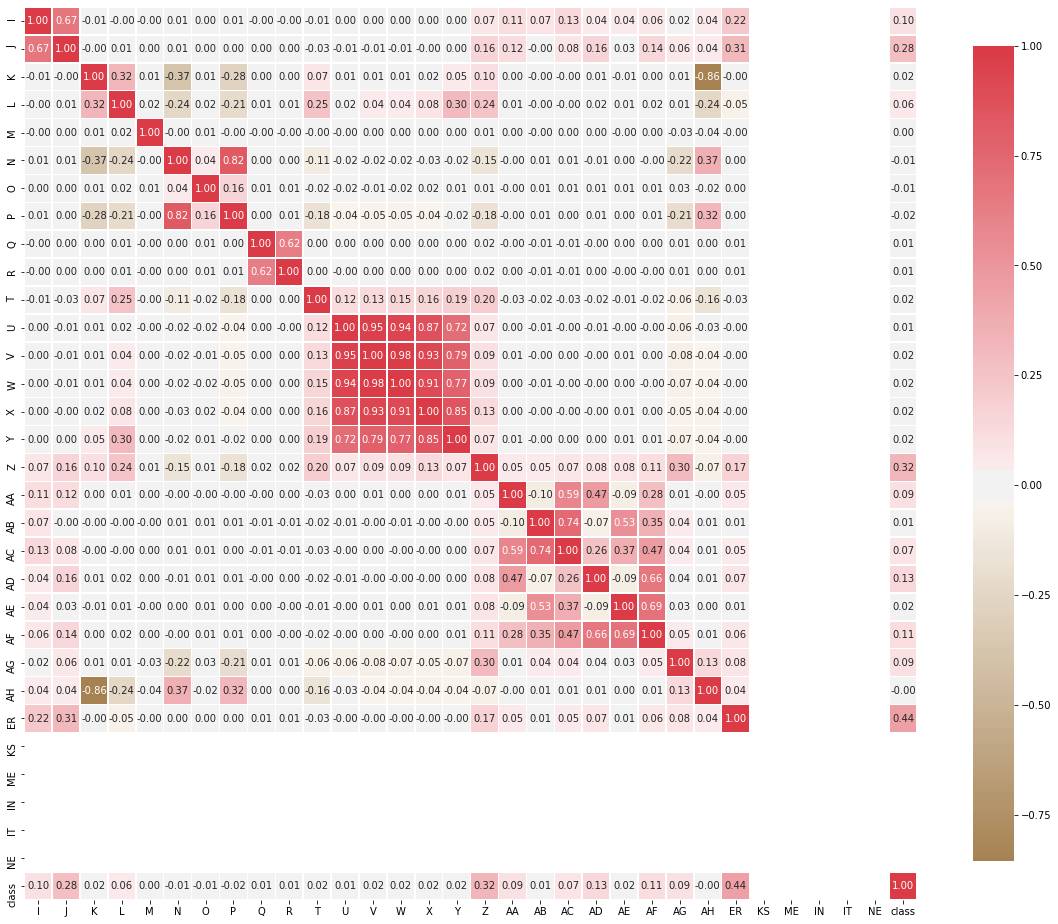

In [109]:
def corr_heatmap(var):
    correlations = KS[var].corr()
    cmap = sns.diverging_palette(50,10,as_cmap = True)
    
    fig,ax = plt.subplots(figsize = (20,20))
    sns.heatmap(correlations, cmap = cmap, vmax = 1.0, center =0, fmt= '.2f', square = True, linewidths = .5, annot = True, cbar_kws = {"shrink" : .75 })
    plt.show();

indices = KS.columns
corr_heatmap(indices)

In [110]:
KS_X = KS.drop(['ER','datetime','KS','ME','IN','IT','NE','W','class'],axis = 1)
KS_Y = pd.DataFrame(KS['ER'])

In [111]:
KS_X

,I,J,K,L,M,N,O,P,Q,R,...,Y,Z,AA,AB,AC,AD,AE,AF,AG,AH
0,-3.752345,-3.932584,16.5,1.6,3.362250,12.12,0.54,2.26,8.10,8.10,...,92.05,59,0.000000,0.000000,0.000000,-0.002533,-0.190352,-0.192884,11.056106,248.148148
1,3.200000,5.521472,16.5,1.6,3.384785,12.12,0.54,2.26,8.20,8.20,...,92.05,60,0.000000,0.000000,0.000000,0.000000,-0.006914,-0.006914,11.138614,250.000000
2,6.130000,0.340716,16.5,1.6,3.862531,0.00,0.00,2.25,9.30,9.30,...,92.05,68,0.000000,0.121205,0.121205,0.000000,0.025723,0.025723,11.138614,250.000000
3,0.350000,-1.215278,31.2,3.9,0.882087,0.00,0.00,2.23,3.70,3.70,...,225.37,66,0.002803,0.001631,0.004434,0.009593,-0.003926,0.005666,11.138614,250.000000
4,-7.710000,-5.850091,20.3,2.5,0.797927,0.00,0.00,2.23,3.30,5.10,...,146.74,64,-0.000814,0.021638,0.020823,-0.002630,0.031756,0.029126,11.138614,250.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
70404,1.700000,-1.900000,-1.2,-0.8,67.750000,4.96,1.40,3.13,-278.45,-278.45,...,-11.00,76,0.110000,0.010000,0.120000,-0.130000,-0.170000,-0.300000,65.000000,231.000000
70405,3.400000,2.400000,6.2,4.4,66.970000,4.96,1.40,3.13,-275.27,51.32,...,59.00,75,-0.010000,0.030000,0.020000,-0.250000,0.170000,-0.080000,63.000000,223.000000
70406,-1.500000,-0.700000,6.2,4.4,60.800000,4.96,1.40,3.13,-249.91,46.59,...,59.00,68,0.030000,-0.030000,0.000000,0.080000,-0.050000,0.030000,57.000000,202.000000
70407,3.200000,2.300000,4.1,2.7,83.960000,4.96,1.78,3.08,47.73,47.73,...,59.00,70,-0.030000,0.090000,0.060000,-0.160000,0.150000,-0.010000,39.000000,109.000000


In [112]:
KS_Y

,ER
0,0.000000
1,0.584795
2,14.147287
3,-3.395586
4,-9.490334
...,...
70404,10.366492
70405,-1.138520
70406,-9.213052
70407,2.431290


In [113]:
test_data = test_set.drop(['Unnamed: 0', 'Unnamed: 0.1', 'Unnamed: 0.1.1', 'B', 'C', 'D', 'E', 'F','H',
       '2017_01', '2017_02', '2017_03', '2017_04', '2017_05', '2017_06',
       '2017_07', '2017_08', '2017_09', '2017_10', '2017_11', '2017_12',
       '2018_01', '2018_02', '2018_03', '2018_04', '2018_05', '2018_06',
       '2018_07', '2018_08', '2018_09', '2018_10', '2018_11', '2018_12',
       '2019_01', '2019_02', '2019_03', '2019_04', '2019_05', '2019_06',
       '2019_07', '2019_08', '2019_09', '2019_10', '2019_11', '2019_12'],axis = 1)

In [114]:
test_KS = test_data[test_data['KS'] == 1]

In [115]:
test_KS_X = test_KS.drop(['ER','datetime','KS','ME','IN','IT','NE','W','G'],axis = 1)

test_KS_Y = pd.DataFrame(test_KS['ER'])

In [116]:
test_KS_X

,I,J,K,L,M,N,O,P,Q,R,...,Y,Z,AA,AB,AC,AD,AE,AF,AG,AH
29,-0.9,4.4,17.5,2.0,1.21,12.12,0.55,1.71,8.28,8.28,...,146.0,76,0.05,-0.05,0.00,0.38,-0.38,0.00,12.0,264.0
30,6.6,16.4,17.5,2.0,1.46,12.12,0.55,1.71,10.01,10.01,...,146.0,91,0.57,0.02,0.58,1.98,-0.20,1.78,15.0,320.0
31,3.9,38.9,17.5,2.0,1.75,12.12,0.55,1.71,11.97,11.97,...,146.0,100,0.98,-0.09,0.88,3.43,-0.50,2.92,17.0,382.0
32,-0.9,0.6,23.2,2.7,1.62,12.12,0.55,1.64,7.13,7.13,...,240.0,84,-0.68,0.00,-0.67,-1.61,-0.13,-1.74,14.0,302.0
33,-3.5,-4.0,23.2,2.7,1.72,12.12,0.55,1.64,7.56,7.56,...,240.0,87,-0.84,-0.21,-1.05,-0.01,0.33,0.32,15.0,320.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
70411,3.4,11.2,5.7,3.8,19.63,4.96,1.35,3.02,26.50,23.98,...,84.0,50,0.01,0.01,0.02,0.07,-0.05,0.02,27.0,100.0
70412,0.8,2.7,5.6,3.7,221.05,4.96,1.42,2.92,25.25,25.25,...,84.0,57,0.04,-0.01,0.03,0.21,-0.10,0.11,29.0,100.0
70413,2.1,-0.5,5.6,3.7,230.74,4.96,1.48,2.92,26.36,26.36,...,84.0,71,0.00,-0.03,-0.03,0.12,0.07,0.19,30.0,100.0
70414,-0.3,3.2,5.2,3.4,-72.11,4.96,1.51,2.92,27.08,29.55,...,77.0,73,0.02,-0.01,0.01,0.16,-0.01,0.15,30.0,100.0


In [117]:
test_KS_Y

,ER
29,-18.997912
30,20.876289
31,18.763326
32,-4.488330
33,3.195489
...,...
70411,-14.019851
70412,5.339105
70413,4.383562
70414,2.755906


In [48]:
#랜덤 포레스트를 이용한 간단한 모델링

from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import RobustScaler
model = RandomForestRegressor()
transformer = RobustScaler()
scaled_X = transformer.fit_transform(KS_X)
model.fit(scaled_X, KS_Y)
from sklearn.metrics import mean_squared_error
some_predicted = model.predict(test_KS_X)
mse = np.sqrt(mean_squared_error(some_predicted, test_KS_Y))
print('평균제곱근오차', mse)

ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

In [ ]:
# 랜덤포레스트를 통한 피쳐 임포턴스 확인

def feature_impt(model, x, y):
    model = model.fit(x, y)
    return model.feature_importances_

rf_impt = feature_impt(model,scaled_X, feature_data_Y)

def graph_generator(model,importances, X):
    std = np.std([tree.feature_importances_ for tree in model.estimators_],
                 axis=0)
    indices = np.argsort(importances)[::-1]

    # Print the feature ranking
    print("Feature ranking:")

    for f in range(X.shape[1]):
        print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))

    # Plot the feature importances of the forest
    plt.figure()
    plt.title("Feature importances")
    plt.bar(range(X.shape[1]), importances[indices],
           color="r", yerr=std[indices], align="center")
    plt.xticks(range(X.shape[1]), indices)
    plt.xlim([-1, X.shape[1]])
    plt.show()
    
graph_generator(model, rf_impt, feature_data_X)